In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

# Load Results

In [42]:
# cleanup files 

def cleanup_mcts(results_dir, out_dir):
    onlyfiles = [f for f in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, f))]
    file_names = [f for f in onlyfiles if f.endswith(".csv")]
    for file_name in file_names:
        file_path = os.path.join(results_dir, file_name)
        df = pd.read_csv(file_path)
        #df['detour_rate'] = df.apply(lambda row: (row['TRT']-row['TDT'])/row['TDT'], axis=1)
        df['servicerate'] = df['servicerate'].apply(lambda x: 100*x)
        out_path = os.path.join(out_dir, file_name)
        df.to_csv(out_path, index=False)

out_dir = os.path.join(os.getcwd(), "..", "data", 'results', 'latex', 'mcvrp')
results_dir = os.path.join(os.getcwd(), "..", "data", "results", "final")
cleanup_mcts(results_dir, out_dir)

In [44]:
def cleanup_icaps(results_dir, out_dir):
    onlyfiles = [f for f in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, f))]
    file_names = [f for f in onlyfiles if f.endswith(".csv")]
    for file_name in file_names:
        file_path = os.path.join(results_dir, file_name)
        df = pd.read_csv(file_path)
        #df['detour_rate'] = df.apply(lambda row: (row['TRT']-row['TDT'])/row['TDT'], axis=1)
        df['servicerate'] = df['valid_service_ratio_filtered'].apply(lambda x: 100*x)
        df['timeperrequest'] = df['time_per_request']
        out_path = os.path.join(out_dir, file_name)
        df.to_csv(out_path, index=False)
        
out_dir = os.path.join(os.getcwd(), "..", "data", 'results', 'latex', 'drlsa')
results_dir = os.path.join(os.getcwd(), "..", "data", "results", "baselines", "icaps")
cleanup_icaps(results_dir, out_dir)

In [45]:
def cleanup_pnas(results_dir, out_dir):
    onlyfiles = [f for f in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, f))]
    file_names = [f for f in onlyfiles if f.endswith(".csv")]
    for file_name in file_names:
        file_path = os.path.join(results_dir, file_name)
        df = pd.read_csv(file_path)
        #df['detour_rate'] = df.apply(lambda row: (row['TRT']-row['TDT'])/row['TDT'], axis=1)
        df['timeperrequest'] = df['computetime']/150
        out_path = os.path.join(out_dir, file_name)
        df.to_csv(out_path, index=False)
        
out_dir = os.path.join(os.getcwd(), "..", "data", 'results', 'latex', 'pnas')
results_dir = os.path.join(os.getcwd(), "..", "data", "results", "baselines", "pnas")
cleanup_pnas(results_dir, out_dir)

In [90]:
def load_mcts_results(results_dir):
    dfs = []
    onlyfiles = [f for f in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, f))]
    file_names = [f for f in onlyfiles if f.endswith(".csv")]
    for file_name in file_names:
        file_path = os.path.join(results_dir, file_name)
        df = pd.read_csv(file_path)
        #df['detour_rate'] = df.apply(lambda row: (row['TRT']-row['TDT'])/row['TDT'], axis=1)
        df['servicerate'] = df['servicerate'].apply(lambda x: 100*x)
        params = file_name.split("_")
        df['num_vehicles'] = int(params[0])
        df['capacity'] = int(params[1])
        df['k_max'] = int(params[2])
        df['vv'] = params[3]
        df['budget'] = params[4]
        df['policy_type'] = params[5]
        df['mcts_iterations'] = int(params[6])
        df['mcts_depth'] = int(params[7])
        df['mcts_num_chains'] = int(params[8])
        if len(params) == 10:
            df['mcts_runtime_input'] = float(params[9].split(".")[0])
            df['cong'] = False
        else:
            df['mcts_runtime_input'] = float(params[9])
            df['cong'] = True
        dfs.append(df)
    result = pd.concat(dfs, ignore_index=True)
    result['heuristic'] = result['budget'].apply(lambda x: "budget" if x=='true' else "PTT")
    result = result.drop(columns=['TRT', 'TDT', 'totaltrips', 'totaltripsserved', 'budget'])
    result['testchainid'] = result['testchainid'].apply(lambda x: x-1)
    result['policy_type'] = result['policy_type'].apply(lambda x: "MC-VRP" if x == 'mcts' else x)
    result['policy'] = result.apply(lambda row: f"{row['policy_type']}, {row['heuristic']}", axis=1)
    return result

def load_icaps_results(results_dir):
    dfs = []
    onlyfiles = [f for f in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, f))]
    file_names = [f for f in onlyfiles if f.endswith(".csv")]
    for file_name in file_names:
        file_path = os.path.join(results_dir, file_name)
        df = pd.read_csv(file_path)
        if "3" in file_name:
            df['num_vehicles'] = 3
        elif "4" in file_name:
            df['num_vehicles'] = 4
        else:
            df['num_vehicles'] = 5
        if 'cong' in file_name:
            df['cong'] = True
        else:
            df['cong'] = False
        df['servicerate'] = df['valid_service_ratio_filtered'].apply(lambda x: 100*x)
        df['timeperrequest'] = df['time_per_request']
        df['testchainid'] = df['chain_id']
        df = df[['num_vehicles', 'servicerate', 'timeperrequest', 'cong', 'testchainid']]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def load_pnas_results(results_dir):
    dfs = []
    onlyfiles = [f for f in os.listdir(results_dir) if os.path.isfile(os.path.join(results_dir, f))]
    file_names = [f for f in onlyfiles if f.endswith(".csv")]
    for file_name in file_names:
        file_path = os.path.join(results_dir, file_name)
        df = pd.read_csv(file_path)
        if "3" in file_name:
            df['num_vehicles'] = 3
        elif "4" in file_name:
            df['num_vehicles'] = 4
        else:
            df['num_vehicles'] = 5
        if 'cong' in file_name:
            df['cong'] = True
        else:
            df['cong'] = False
        df['timeperrequest'] = df['computetime']/150
        df['testchainid'] = list(range(len(df)))
        df = df[['num_vehicles', 'servicerate', 'timeperrequest', 'cong', 'testchainid']]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [91]:
results_dir = os.path.join(os.getcwd(), "..", "data", "results", "baselines", "pnas")
df_pnas = load_pnas_results(results_dir)
df_pnas.head(2)

,num_vehicles,servicerate,timeperrequest,cong,testchainid
0,3,65.7534,0.065314,True,0
1,3,76.5101,0.162534,True,1


In [92]:
results_dir = os.path.join(os.getcwd(), "..", "data", "results", "baselines", "icaps")
df_icaps = load_icaps_results(results_dir)
df_icaps.head(2)

,num_vehicles,servicerate,timeperrequest,cong,testchainid
0,3,40.0,0.46,True,0.0
1,3,37.0,0.47,True,1.0


In [93]:
results_dir = os.path.join(os.getcwd(), "..", "data", "results", "final")
df_mcts = load_mcts_results(results_dir)
df_mcts.head(2)

,servicerate,timeperrequest,testchainid,num_vehicles,capacity,k_max,vv,policy_type,mcts_iterations,mcts_depth,mcts_num_chains,mcts_runtime_input,cong,heuristic,policy
0,84.027778,0.018441,0,3,8,10,true,greedy,1000,20,1,inf,False,PTT,"greedy, PTT"
1,75.796178,0.016120,1,3,8,10,true,greedy,1000,20,1,inf,False,PTT,"greedy, PTT"


In [11]:
temp = df_pnas.groupby(['num_vehicles', 'cong']).mean()
temp

servicerate  timeperrequest  testchainid
num_vehicles cong                                           
3            False    82.233713        1.301023            7
             True     66.530787        0.137467            7
4            False    95.689647        1.340246            7
             True     80.462627        0.138405            7
5            False    99.385500        1.322477            7
             True     90.947567        0.167288            7

In [12]:
temp = df_icaps.groupby(['num_vehicles', 'cong']).mean()
temp

servicerate  timeperrequest  testchainid
num_vehicles cong                                           
3            False    53.733333        0.486667          7.0
             True     38.800000        0.494667          7.0
4            False    65.733333        0.528000          7.0
             True     50.933333        0.583333          7.0
5            False    71.533333        0.622667          7.0
             True     57.000000        0.645333          7.0

In [20]:
temp = df_mcts[['num_vehicles', 'servicerate', 'timeperrequest', 'cong', 'testchainid', 'policy', 'mcts_runtime_input']]
temp = temp.groupby(['num_vehicles', 'cong', 'policy', 'mcts_runtime_input']).median()
temp

servicerate  \
num_vehicles cong  policy         mcts_runtime_input                
3            False MC-VRP, PTT    inf                   84.656085   
                   MC-VRP, budget 30.0                  85.964912   
                                  inf                   86.934673   
                   greedy, PTT    inf                   77.397260   
                   greedy, budget inf                   80.597015   
             True  MC-VRP, budget inf                   68.396226   
4            False MC-VRP, PTT    inf                   95.767196   
                   MC-VRP, budget 30.0                  97.837838   
                                  inf                   97.530864   
                   greedy, PTT    inf                   90.058480   
                   greedy, budget inf                   94.904459   
5            False MC-VRP, PTT    inf                   99.305556   
                   MC-VRP, budget 30.0                  99.435028   
                                  inf                   99.438202   
                   greedy, PTT    inf                   97.512438   
                   greedy, budget inf                   99.328859   

                                                      timeperrequest  \
num_vehicles cong  policy         mcts_runtime_input                   
3            False MC-VRP, PTT    inf                      36.103199   
                   MC-VRP, budget 30.0                     23.830696   
                                  inf                      38.404681   
                   greedy, PTT    inf                       0.018749   
                   greedy, budget inf                       0.020265   
             True  MC-VRP, budget inf                      15.347860   
4            False MC-VRP, PTT    inf                      43.680396   
                   MC-VRP, budget 30.0                     24.234426   
                                  inf                      49.668057   
                   greedy, PTT    inf                       0.011919   
                   greedy, budget inf                       0.013486   
5            False MC-VRP, PTT    inf                      37.546116   
                   MC-VRP, budget 30.0                     21.865026   
                                  inf                      40.641664   
                   greedy, PTT    inf                       0.012806   
                   greedy, budget inf                       0.011875   

                                                      testchainid  
num_vehicles cong  policy         mcts_runtime_input               
3            False MC-VRP, PTT    inf                           7  
                   MC-VRP, budget 30.0                          7  
                                  inf                           7  
                   greedy, PTT    inf                           7  
                   greedy, budget inf                           7  
             True  MC-VRP, budget inf                           7  
4            False MC-VRP, PTT    inf                           7  
                   MC-VRP, budget 30.0                          7  
                                  inf                           7  
                   greedy, PTT    inf                           7  
                   greedy, budget inf                           7  
5            False MC-VRP, PTT    inf                           7  
                   MC-VRP, budget 30.0                          7  
                                  inf                           7  
                   greedy, PTT    inf                           7  
                   greedy, budget inf                           7

# Experiment 1

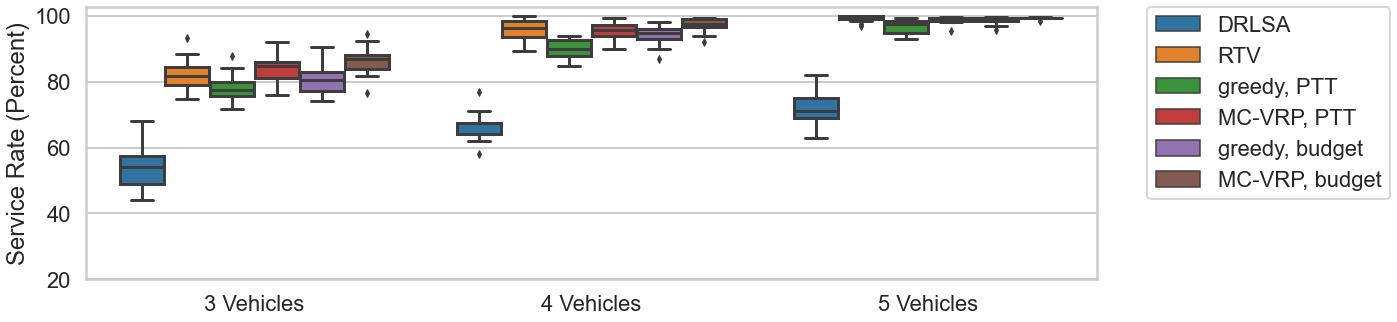

In [86]:
dfs = []

temp = df_icaps.copy(deep=True)
temp = temp[temp['cong']==False]
temp['policy'] = "DRLSA"
temp = temp[['policy', 'num_vehicles', 'servicerate', 'timeperrequest']]
dfs.append(temp.copy(deep=True))

temp = df_pnas.copy(deep=True)
temp = temp[temp['cong']==False]
temp['policy'] = "RTV"
temp = temp[['policy', 'num_vehicles', 'servicerate', 'timeperrequest']]
dfs.append(temp.copy(deep=True))

temp = df_mcts[df_mcts['mcts_runtime_input']==np.inf]
temp = temp[temp['cong']==False]
temp = temp[['policy', 'num_vehicles', 'servicerate', 'timeperrequest']]
dfs.append(temp.copy(deep=True))

df_plot = pd.concat(dfs)
#df_plot.head(3)

df_plot['Number of Vehicles'] = df_plot['num_vehicles'].apply(lambda x: f"{x} Vehicles")
df_plot['Service Rate (Percent)'] = df_plot['servicerate'].apply(lambda x: x)

sns.set_style("whitegrid")
sns.set_context("poster")
f, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df_plot, x="Number of Vehicles", y="Service Rate (Percent)", hue="policy")
ax.set(xlabel=None)
ax.set(ylim=(20, None))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
file_path = os.path.join(os.getcwd(), "..", "data", "results", "img", "servicerate.pdf")
plt.savefig(file_path, dpi=300)
plt.show()

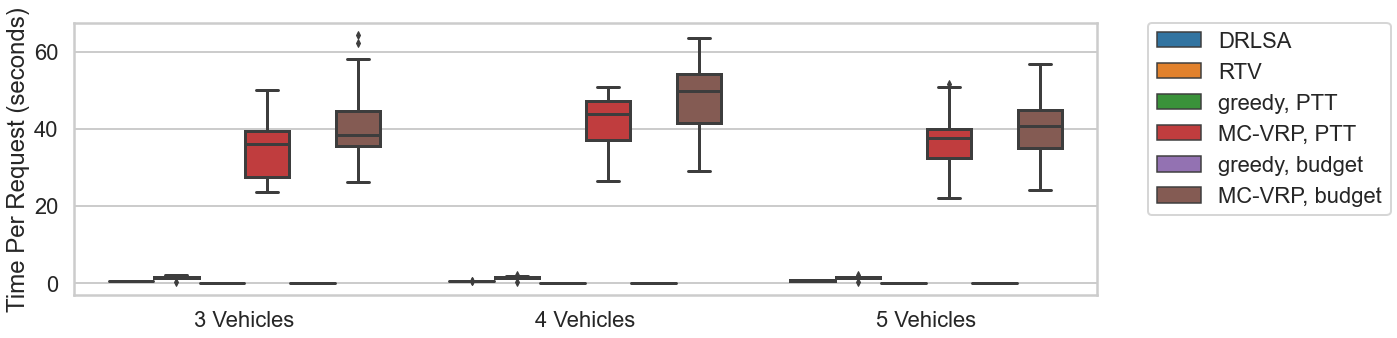

In [38]:
df_plot['Time Per Request (seconds)'] = df_plot['timeperrequest'].apply(lambda x: x)

sns.set_style("whitegrid")
sns.set_context("poster")
f, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df_plot, x="Number of Vehicles", y="Time Per Request (seconds)", hue="policy")
ax.set(xlabel=None)
#ax.set(ylim=(20, None))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
file_path = os.path.join(os.getcwd(), "..", "data", "results", "img", "timeperrequest.pdf")
plt.savefig(file_path, dpi=300)
plt.show()

# Runtime Experiments

<ipython-input-101-08dd7b70d836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Number of Vehicles'] = temp['num_vehicles'].apply(lambda x: f"{x} Vehicles")


45
45
45


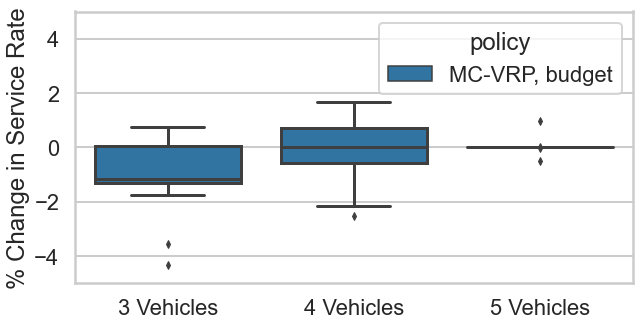

In [101]:
temp = df_mcts[(df_mcts['policy']=='MC-VRP, budget') & (df_mcts['num_vehicles'].isin([3,4,5])) & (df_mcts['cong']==False)]
temp['Number of Vehicles'] = temp['num_vehicles'].apply(lambda x: f"{x} Vehicles")
temp = temp[['servicerate', 'Number of Vehicles', 'policy', 'mcts_runtime_input', 'testchainid', 'num_vehicles']]

df_cut = temp[temp['mcts_runtime_input']==30.0]
print(len(df_cut))

df_o = temp[temp['mcts_runtime_input']==np.inf]
print(len(df_o))

df_plot = df_cut.merge(df_o, left_on=['policy', 'Number of Vehicles', 'testchainid'], right_on=['policy', 'Number of Vehicles', 'testchainid'])
print(len(df_plot))


#df_plot['% Change in Service Rate'] = df_plot.apply(lambda row: ((row['servicerate_x'] - row['servicerate_y'])), axis=1)
df_plot['% Change in Service Rate'] = df_plot.apply(lambda row: 100*((row['servicerate_x'] - row['servicerate_y']))/row['servicerate_y'], axis=1)

sns.set_style("whitegrid")
sns.set_context("poster")
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_plot, x="Number of Vehicles", y="% Change in Service Rate", hue="policy")
ax.set(xlabel=None)
ax.set(ylim=(-5.0, 5.0))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
file_path = os.path.join(os.getcwd(), "..", "data", "results", "img", "runtime.pdf")
plt.savefig(file_path, dpi=300)
plt.show()


In [102]:
df_plot['serviceratechange'] = df_plot['% Change in Service Rate']
df_plot['numvehicles'] = df_plot['num_vehicles_x']

result = {}

temp = df_plot[df_plot['numvehicles']==3]
result['threevehicles'] = temp['serviceratechange'].tolist()

temp = df_plot[df_plot['numvehicles']==4]
result['fourvehicles'] = temp['serviceratechange'].tolist()

temp = df_plot[df_plot['numvehicles']==5]
result['fivevehicles'] = temp['serviceratechange'].tolist()

file_path = os.path.join(os.getcwd(), "..", "data", 'results', 'latex', 'runtime.csv')
result = pd.DataFrame(result)
result.to_csv(file_path, index=False)

In [52]:
temp

,servicerate_x,Number of Vehicles,policy,mcts_runtime_input_x,testchainid,num_vehicles_x,servicerate_y,mcts_runtime_input_y,num_vehicles_y,% Change in Service Rate,serviceratechange,numvehicles
30,99.305556,5 Vehicles,"MC-VRP, budget",30.0,0,5,99.305556,inf,5,0.000000,0.000000,5
31,99.363057,5 Vehicles,"MC-VRP, budget",30.0,1,5,99.363057,inf,5,0.000000,0.000000,5
32,99.459459,5 Vehicles,"MC-VRP, budget",30.0,2,5,99.459459,inf,5,0.000000,0.000000,5
33,99.435028,5 Vehicles,"MC-VRP, budget",30.0,3,5,99.438202,inf,5,-0.003192,-0.003192,5
34,99.497487,5 Vehicles,"MC-VRP, budget",30.0,4,5,99.497487,inf,5,0.000000,0.000000,5
35,99.528302,5 Vehicles,"MC-VRP, budget",30.0,5,5,99.528302,inf,5,0.000000,0.000000,5
36,99.453552,5 Vehicles,"MC-VRP, budget",30.0,6,5,99.453552,inf,5,0.000000,0.000000,5
37,99.470899,5 Vehicles,"MC-VRP, budget",30.0,7,5,99.470899,inf,5,0.000000,0.000000,5
38,99.315068,5 Vehicles,"MC-VRP, budget",30.0,8,5,99.319728,inf,5,-0.004691,-0.004691,5
39,99.328859,5 Vehicles,"MC-VRP, budget",30.0,9,5,99.328859,inf,5,0.000000,0.000000,5


In [49]:
df_plot.head()

,servicerate_x,Number of Vehicles,policy,mcts_runtime_input_x,testchainid,num_vehicles_x,servicerate_y,mcts_runtime_input_y,num_vehicles_y,% Change in Service Rate
0,88.194444,3 Vehicles,"MC-VRP, budget",30.0,0,3,88.888889,inf,3,-0.781250
1,84.076433,3 Vehicles,"MC-VRP, budget",30.0,1,3,83.439490,inf,3,0.763359
2,85.945946,3 Vehicles,"MC-VRP, budget",30.0,2,3,87.027027,inf,3,-1.242236
3,88.700565,3 Vehicles,"MC-VRP, budget",30.0,3,3,84.269663,inf,3,5.258004
4,85.929648,3 Vehicles,"MC-VRP, budget",30.0,4,3,86.934673,inf,3,-1.156069


# Robustness

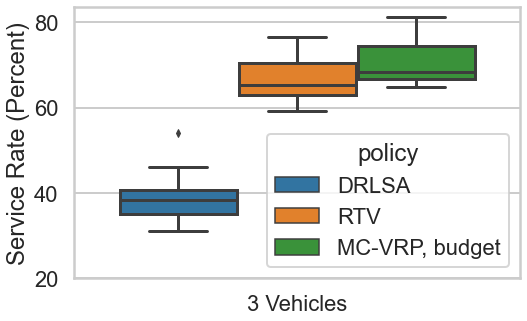

In [11]:
dfs = []

temp = df_icaps.copy(deep=True)
temp = temp[temp['cong']==True]
temp['policy'] = "DRLSA"
temp = temp[['policy', 'num_vehicles', 'servicerate', 'timeperrequest', 'testchainid']]
dfs.append(temp.copy(deep=True))

temp = df_pnas.copy(deep=True)
temp = temp[temp['cong']==True]
temp['policy'] = "RTV"
temp = temp[['policy', 'num_vehicles', 'servicerate', 'timeperrequest', 'testchainid']]
dfs.append(temp.copy(deep=True))

temp = df_mcts[df_mcts['mcts_runtime_input']==np.inf]
temp = temp[temp['cong']==True]
temp = temp[['policy', 'num_vehicles', 'servicerate', 'timeperrequest', 'testchainid']]
dfs.append(temp.copy(deep=True))

df_plot = pd.concat(dfs)
#df_plot = df_plot[df_plot['num_vehicles']==3]
df_plot = df_plot[df_plot['testchainid']]

df_plot['Number of Vehicles'] = df_plot['num_vehicles'].apply(lambda x: f"{x} Vehicles")
df_plot['Service Rate (Percent)'] = df_plot['servicerate'].apply(lambda x: x)

sns.set_style("whitegrid")
sns.set_context("poster")
#f, ax = plt.subplots(figsize=(20, 5))
f, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_plot, x="Number of Vehicles", y="Service Rate (Percent)", hue="policy")
ax.set(xlabel=None)
ax.set(ylim=(20, None))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
file_path = os.path.join(os.getcwd(), "..", "data", "results", "img", "serviceratecong.pdf")
plt.savefig(file_path, dpi=300)
plt.show()

In [108]:
dfs = []

temp = df_icaps.copy(deep=True)
temp['policy'] = "DRLSA"
temp = temp[['policy', 'num_vehicles', 'servicerate', 'testchainid', 'cong']]
temp_cut = temp[temp['cong']==True]
temp_o = temp[temp['cong']==False]
temp = temp_cut.merge(temp_o, left_on=['policy', 'num_vehicles', 'testchainid'], right_on=['policy', 'num_vehicles', 'testchainid'])
#temp['% Change in Service Rate'] = temp.apply(lambda row: (row['servicerate_x'] - row['servicerate_y']), axis=1)
temp['% Change in Service Rate'] = temp.apply(lambda row: 100*(row['servicerate_x'] - row['servicerate_y'])/row['servicerate_y'], axis=1)
dfs.append(temp.copy(deep=True))

temp = df_pnas.copy(deep=True)
temp['policy'] = "RTV"
temp = temp[['policy', 'num_vehicles', 'servicerate', 'testchainid', 'cong']]
temp_cut = temp[temp['cong']==True]
temp_o = temp[temp['cong']==False]
temp = temp_cut.merge(temp_o, left_on=['policy', 'num_vehicles', 'testchainid'], right_on=['policy', 'num_vehicles', 'testchainid'])
#temp['% Change in Service Rate'] = temp.apply(lambda row: (row['servicerate_x'] - row['servicerate_y']), axis=1)
temp['% Change in Service Rate'] = temp.apply(lambda row: 100*(row['servicerate_x'] - row['servicerate_y'])/row['servicerate_y'], axis=1)
dfs.append(temp.copy(deep=True))

temp = df_mcts.copy(deep=True)
temp = temp[(temp['policy_type']=='MC-VRP') & (temp['heuristic']=='budget') & (temp['mcts_runtime_input']==np.inf)]
temp = temp[['policy', 'num_vehicles', 'servicerate', 'testchainid', 'cong', 'policy_type']]
temp_cut = temp[temp['cong']==True]
temp_o = temp[temp['cong']==False]
temp = temp_cut.merge(temp_o, left_on=['policy', 'num_vehicles', 'testchainid'], right_on=['policy', 'num_vehicles', 'testchainid'])
#temp['% Change in Service Rate'] = temp.apply(lambda row: (row['servicerate_x'] - row['servicerate_y']), axis=1)
temp['% Change in Service Rate'] = temp.apply(lambda row: 100*(row['servicerate_x'] - row['servicerate_y'])/row['servicerate_y'], axis=1)
dfs.append(temp.copy(deep=True))

df_plot = pd.concat(dfs)
df_plot['Number of Vehicles'] = df_plot['num_vehicles']
#df_plot['% Change in Service Rate'] = df_plot['% Change in Service Rate'].apply(lambda x: -.1 if x >= 0 else x)

df_plot.head(2)

,policy,num_vehicles,servicerate_x,testchainid,cong_x,servicerate_y,cong_y,% Change in Service Rate,policy_type_x,policy_type_y,Number of Vehicles
0,DRLSA,3,40.0,0.0,True,50.0,False,-20.000000,NaN,NaN,3
1,DRLSA,3,37.0,1.0,True,48.0,False,-22.916667,NaN,NaN,3


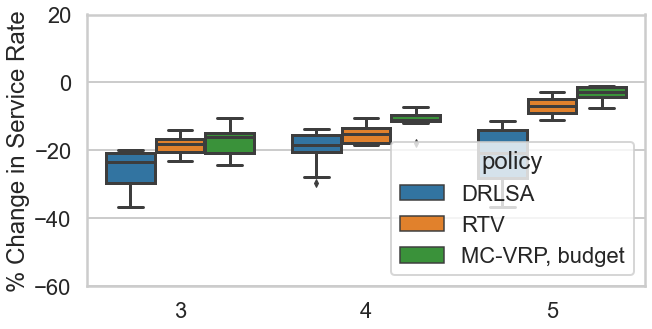

In [109]:
#df_plot = df_plot[df_plot['Number of Vehicles']==3]
df_plot = df_plot[df_plot['testchainid'].isin([0,1,2,3,4,5,6,7,8])]

sns.set_style("whitegrid")
sns.set_context("poster")
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_plot, x="Number of Vehicles", y="% Change in Service Rate", hue="policy")
ax.set(xlabel=None)
ax.set(ylim=(-60, 20))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
file_path = os.path.join(os.getcwd(), "..", "data", "results", "img", "serviceratecongdiff.pdf")
plt.savefig(file_path, dpi=300)
plt.show()

In [113]:
df_plot.head(3)

,policy,num_vehicles,servicerate_x,testchainid,cong_x,servicerate_y,cong_y,% Change in Service Rate,policy_type_x,policy_type_y,Number of Vehicles
0,DRLSA,3,40.0,0.0,True,50.0,False,-20.000000,NaN,NaN,3
1,DRLSA,3,37.0,1.0,True,48.0,False,-22.916667,NaN,NaN,3
2,DRLSA,3,40.0,2.0,True,55.0,False,-27.272727,NaN,NaN,3


In [114]:
df_plot['policy'].unique()

array(['DRLSA', 'RTV', 'MC-VRP, budget'], dtype=object)

In [115]:
df_plot['serviceratechange'] = df_plot['% Change in Service Rate']
df_plot = df_plot[['num_vehicles', 'serviceratechange', 'policy']]

result = {}

temp = df_plot[(df_plot['num_vehicles']==3) & (df_plot['policy']=='DRLSA')]
result['drlsathree'] = temp['serviceratechange'].tolist()
temp = df_plot[(df_plot['num_vehicles']==4) & (df_plot['policy']=='DRLSA')]
result['drlsafour'] = temp['serviceratechange'].tolist()
temp = df_plot[(df_plot['num_vehicles']==5) & (df_plot['policy']=='DRLSA')]
result['drlsafive'] = temp['serviceratechange'].tolist()

temp = df_plot[(df_plot['num_vehicles']==3) & (df_plot['policy']=='RTV')]
result['rtvthree'] = temp['serviceratechange'].tolist()
temp = df_plot[(df_plot['num_vehicles']==4) & (df_plot['policy']=='RTV')]
result['rtvfour'] = temp['serviceratechange'].tolist()
temp = df_plot[(df_plot['num_vehicles']==5) & (df_plot['policy']=='RTV')]
result['rtvfive'] = temp['serviceratechange'].tolist()

temp = df_plot[(df_plot['num_vehicles']==3) & (df_plot['policy']=='MC-VRP, budget')]
result['mcvrpthree'] = temp['serviceratechange'].tolist()
temp = df_plot[(df_plot['num_vehicles']==4) & (df_plot['policy']=='MC-VRP, budget')]
result['mcvrpfour'] = temp['serviceratechange'].tolist()
temp = df_plot[(df_plot['num_vehicles']==5) & (df_plot['policy']=='MC-VRP, budget')]
result['mcvrpfive'] = temp['serviceratechange'].tolist()

result = pd.DataFrame(result)
file_path = os.path.join(os.getcwd(), "..", "data", 'results', 'latex', 'robust.csv')
result.to_csv(file_path, index=False)

In [116]:
result.median()

drlsathree   -23.333333
drlsafour    -18.461538
drlsafive    -20.895522
rtvthree     -18.128561
rtvfour      -15.104206
rtvfive       -7.035200
mcvrpthree   -16.184971
mcvrpfour    -10.967742
mcvrpfive     -2.717391
dtype: float64

In [40]:
print(len(df_plot), len(df_plot[df_plot['% Change in Service Rate']>0]))

64 0


# Data Description

In [15]:
# raw
file_path = os.path.join(os.getcwd(), "..", "data", "CARTA", "base", "para_transit_trips_2021.csv")
raw_trips = pd.read_csv(file_path)
print(len(raw_trips))
raw_trips.head()

25843


,Client Id,Booking Id,Subscription Id,Direct Distance,Sch Time in HH:MM:SS,Date,Pickup Zip,Pickup lat,Pickup lon,Dropoff Zip,Dropoff lat,Dropoff lon,Passenger Types,AM/WC,Run,Dwell at Pickup,Travel Time,pickup adherence in minutes,dropoff adherence in minutes,is critically late
0,4622,1014492,3607,9.76,4:15:00,2021-01-01,37402.0,35.045644,-85.319982,37411.0,35.022033,-85.241765,WH1,WC,2,999,999,999,999,999
1,3711,1014548,4104,7.99,4:15:00,2021-01-01,37408.0,35.032584,-85.316599,37411.0,35.022087,-85.241776,AM1,AM,2,999,999,999,999,999
2,6287,1014544,4098,0.87,4:20:00,2021-01-01,37408.0,35.024964,-85.247725,37411.0,35.022033,-85.241765,AM1,AM,2,999,999,999,999,999
3,4467,1014532,4055,2.89,4:30:00,2021-01-01,37411.0,35.015012,-85.218661,37411.0,35.022087,-85.241776,AM1,AM,2,999,999,999,999,999
4,6341,1014478,3309,3.32,4:40:00,2021-01-01,37406.0,35.047207,-85.236001,37411.0,35.022033,-85.241765,AM1,AM,2,999,999,999,999,999


In [16]:
# processed
file_path = os.path.join(os.getcwd(), "..", "data", "CARTA", "processed", "para_transit_trips_2021.csv")
trips = pd.read_csv(file_path, parse_dates=['pickup_datetime', 'dropoff_datetime'])
trips['date'] = trips['pickup_datetime'].apply(lambda x: x.date())
trips['dow'] = trips['pickup_datetime'].apply(lambda x: x.weekday())
print(len(trips))
trips.head()

24523


,distance,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,am_wc,pickup_node_id,pickup_osmid,dropoff_node_id,dropoff_osmid,travel_time,pickup_datetime,dropoff_datetime,date,dow
0,9.76,35.045644,-85.319982,35.022033,-85.241765,WC,5839,202694168,595,202579218,551.921936,2021-01-01 04:15:00,2021-01-01 04:24:11,2021-01-01,4
1,7.99,35.032584,-85.316599,35.022087,-85.241776,AM,236,202546601,595,202579218,524.678406,2021-01-01 04:15:00,2021-01-01 04:23:44,2021-01-01,4
2,0.87,35.024964,-85.247725,35.022033,-85.241765,AM,5897,202696273,595,202579218,64.347206,2021-01-01 04:20:00,2021-01-01 04:21:04,2021-01-01,4
3,2.89,35.015012,-85.218661,35.022087,-85.241776,AM,5586,202685290,595,202579218,277.149414,2021-01-01 04:30:00,2021-01-01 04:34:37,2021-01-01,4
4,3.32,35.047207,-85.236001,35.022033,-85.241765,AM,3053,202632234,595,202579218,242.706818,2021-01-01 04:40:00,2021-01-01 04:44:02,2021-01-01,4


In [18]:
len(trips['date'].unique())

180

In [19]:
# filtering
trips = trips[trips['dow'].isin([0,1,2,3,4])]
print(len(trips))
trips = trips[trips['distance']<=200]
print(len(trips))
print(len(trips['date'].unique()))

23052
23052
129


# Void

In [ ]:
#df_plot = df[(df['k_max']==10) & (df['vv']=='true')]
df_plot = df[(df['vv']=='true') & (df['num_vehicles']==4)]
df_plot['hue'] = df_plot.apply(lambda row: f"policy: {row['policy_type']} num_vehicles: {row['num_vehicles']} swap: {row['vv']} budget: {row['budget']} k_max: {row['k_max']} mcts_iterations: {row['mcts_iterations']} mcts_depth: {row['mcts_depth']} mcts_num_chains: {row['mcts_num_chains']} mcts_runtime_input: {row['mcts_runtime_input']}", axis=1)

data = []
ind = []
for hue in df_plot['hue'].unique():
    temp = df_plot[df_plot['hue']==hue]
    quantiles = temp['servicerate'].quantile([0.01, 0.25, 0.5, 0.75, 0.99]).tolist()
    #print(hue)
    #print(quantiles)
    d = {'lower_whisker': quantiles[0], 'lower_quartile': quantiles[1], 'median': quantiles[2], 'upper_quartile': quantiles[3], 'upper_whisker': quantiles[4]}
    data.append(d)
    ind.append(hue)

result = pd.DataFrame.from_records(data, index=ind)
filepath = os.path.join(os.getcwd(), "..", "data", "latex", "servicerate.csv")
result.to_csv(filepath, index=True)
result = result.sort_values(by=['median'], ascending=False)
result

In [ ]:

# create results table
tab = df.groupby(["num_vehicles", "capacity", "k_max", "vv", "budget", "policy_type", "mcts_iterations", "mcts_depth", "mcts_num_chains", "mcts_runtime_input"]).mean()
tab = tab[['servicerate', 'totaltripsserved', 'detour_rate', 'timeperrequest']]
tab = tab.reset_index()


In [ ]:

# create results table
tab = df.groupby(["num_vehicles", "capacity", "k_max", "vv", "budget", "policy_type", "mcts_iterations", "mcts_depth", "mcts_num_chains", "mcts_runtime_input"]).median()
tab = tab[['servicerate', 'totaltripsserved', 'detour_rate', 'timeperrequest']]
tab = tab.reset_index()

In [ ]:
tab[tab['num_vehicles']==3]

In [ ]:
df['hue'] = df.apply(lambda row: f"policy: {row['policy_type']}, swap: {row['vv']}, budget: {row['budget']}, k_max: {row['k_max']}", axis=1)

In [ ]:
# service rate plot
df_plot = df[(df['vv']=='true')]
fig = sns.catplot(data=df_plot, kind="bar", x="num_vehicles", y="servicerate", hue="hue")
file_path = os.path.join(os.getcwd(), "..", "data", "img", "servicerate.png")
fig.savefig(file_path)
fig

In [ ]:
# service rate plot
df_plot = df[(df['vv']=='true')]
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df_plot, x="num_vehicles", y="servicerate", hue="hue")
file_path = os.path.join(os.getcwd(), "..", "data", "img", "paper", "servicerate.png")
plt.savefig(file_path)
plt.show()

In [ ]:
# service rate plot
df_plot = df[(df['policy_type']=='mcts')]
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df_plot, x="num_vehicles", y="servicerate", hue="hue")
file_path = os.path.join(os.getcwd(), "..", "data", "img", "paper", "servicerate.png")
plt.savefig(file_path)
plt.show()